In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 2: Load and preprocess the dataset
train_data =pd.read_csv(r"C:\Users\imran\OneDrive - UWE Bristol\Desktop\UNSW_NB15_training-set.csv")
test_data =pd.read_csv(r"C:\Users\imran\OneDrive - UWE Bristol\Desktop\UNSW_NB15_testing-set.csv")

In [3]:
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
# Combine train and test datasets
df = pd.concat([train_data, test_data], axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [7]:
# Data preprocessing
df = df.dropna()  # Drop any missing values
label_encoder = LabelEncoder()
categorical_features = ['proto', 'service', 'state']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [8]:
# Drop attack_cat column
df = df.drop('attack_cat', axis=1)

In [9]:
# Train-test split
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Step 2: Implement and evaluate models
# Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_score = accuracy_score(y_test, rforest_pred)

In [12]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)

In [13]:
# Step 3: Create a ranking table and plot the results
# Create a DataFrame with the algorithm names and accuracy scores
accuracy_scores = pd.DataFrame({
    'Algorithm': ['Random Forest', 'Support Vector Machine'],
    'Accuracy Score': [rforest_score, svm_score]
})

In [14]:
# Sort the DataFrame by accuracy score in descending order
accuracy_scores = accuracy_scores.sort_values(by='Accuracy Score', ascending=False)

In [15]:
# Add a Rank column based on the sorted accuracy scores
accuracy_scores['Rank'] = range(1, len(accuracy_scores) + 1)

In [16]:
# Reorder the DataFrame columns
accuracy_scores = accuracy_scores[['Rank', 'Algorithm', 'Accuracy Score']]

In [17]:
# Display the ranking table
print(accuracy_scores)

   Rank               Algorithm  Accuracy Score
0     1           Random Forest        0.983351
1     2  Support Vector Machine        0.934568


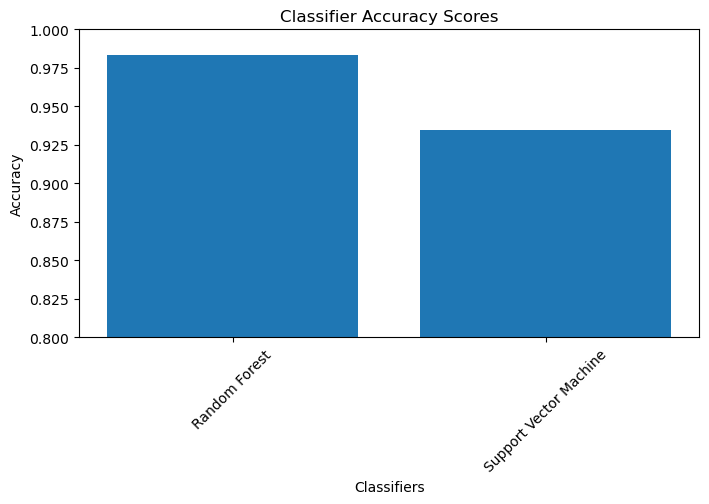

In [18]:
# Plot the classifier accuracy scores
plt.figure(figsize=(8, 4))
plt.bar(accuracy_scores['Algorithm'], accuracy_scores['Accuracy Score'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Scores')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

╒════════╤════════════════════════╤══════════════════╕
│   Rank │ Algorithm              │   Accuracy Score │
╞════════╪════════════════════════╪══════════════════╡
│      1 │ Random Forest          │         0.983351 │
├────────┼────────────────────────┼──────────────────┤
│      2 │ Support Vector Machine │         0.934568 │
╘════════╧════════════════════════╧══════════════════╛


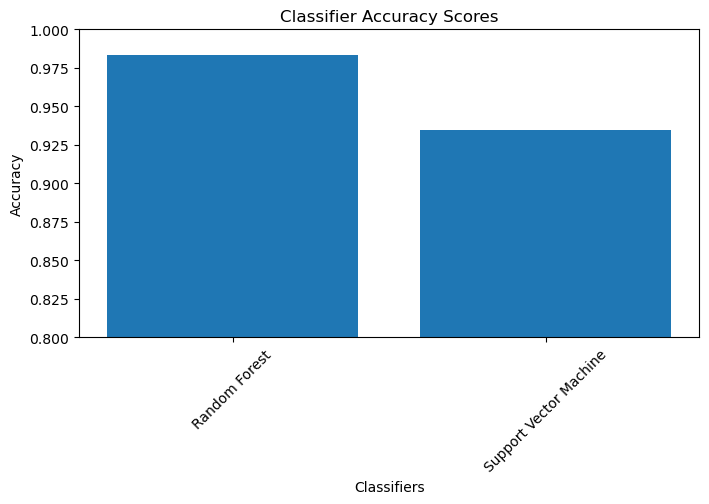

In [19]:
from tabulate import tabulate
# Add a Rank column based on the sorted accuracy scores
accuracy_scores['Rank'] = range(1, len(accuracy_scores) + 1)

# Reorder the DataFrame columns
accuracy_scores = accuracy_scores[['Rank', 'Algorithm', 'Accuracy Score']]

# Display the ranking table using tabulate
print(tabulate(accuracy_scores, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot the classifier accuracy scores
plt.figure(figsize=(8, 4))
plt.bar(accuracy_scores['Algorithm'], accuracy_scores['Accuracy Score'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Scores')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

In [20]:
import seaborn as sns

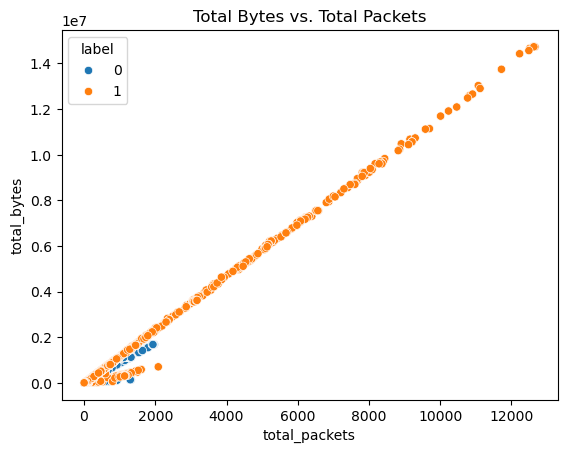

In [21]:
df['total_bytes'] = df['sbytes'] + df['dbytes']
df['total_packets'] = df['spkts'] + df['dpkts']
sns.scatterplot(x='total_packets', y='total_bytes', hue='label', data=df)
plt.title('Total Bytes vs. Total Packets')
plt.show()

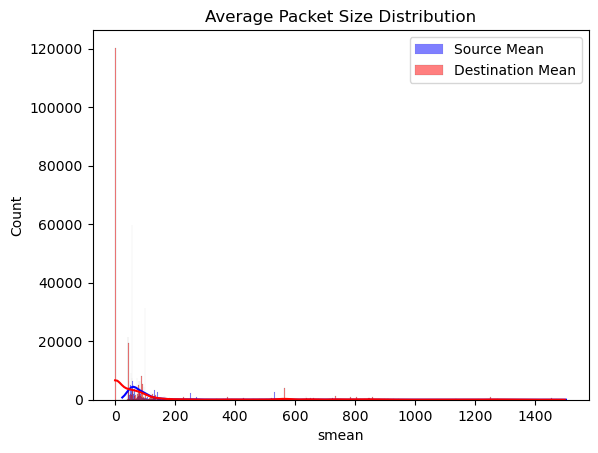

In [22]:
sns.histplot(df['smean'], color='blue', label='Source Mean', kde=True)
sns.histplot(df['dmean'], color='red', label='Destination Mean', kde=True)
plt.title('Average Packet Size Distribution')
plt.legend()
plt.show()

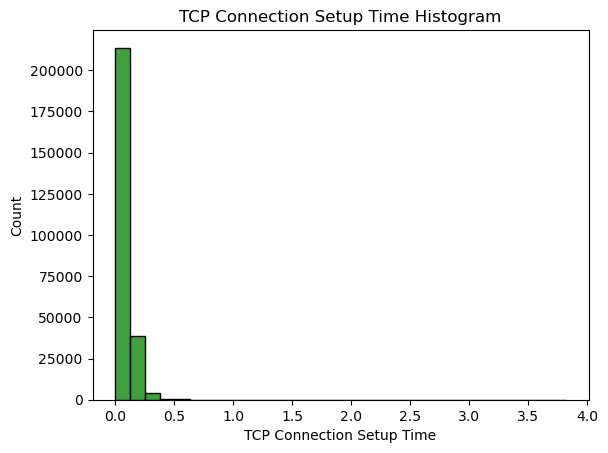

In [23]:
sns.histplot(df['tcprtt'], bins=30, color='green')
plt.title('TCP Connection Setup Time Histogram')
plt.xlabel('TCP Connection Setup Time')
plt.show()

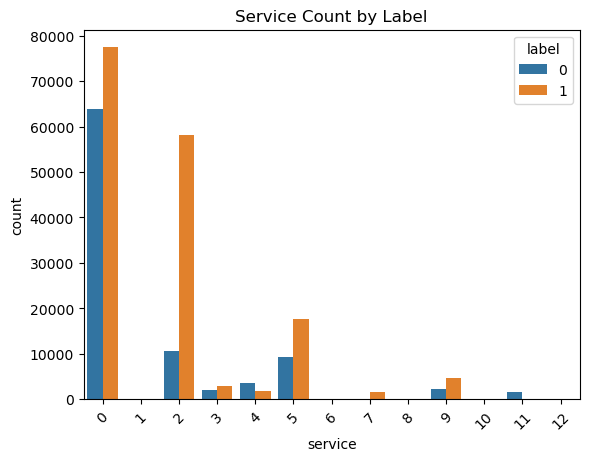

In [24]:
sns.countplot(x='service', hue='label', data=df)
plt.title('Service Count by Label')
plt.xticks(rotation=45)
plt.show()

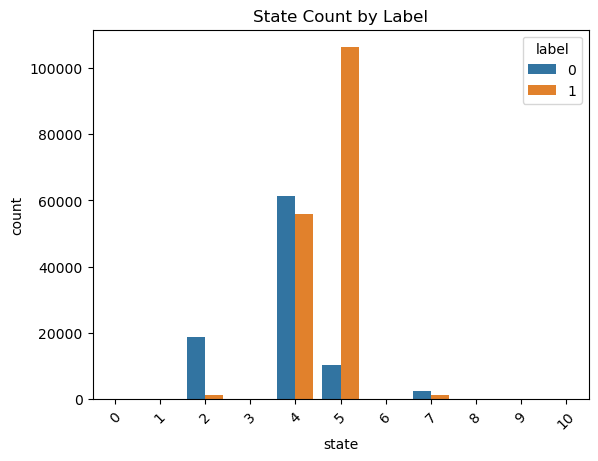

In [25]:
sns.countplot(x='state', hue='label', data=df)
plt.title('State Count by Label')
plt.xticks(rotation=45)
plt.show()

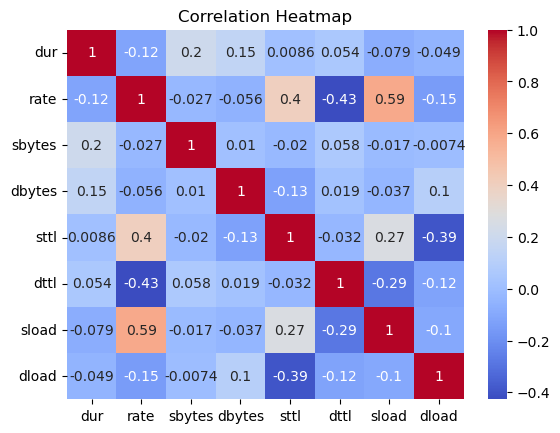

In [26]:
correlation_matrix = df[['dur', 'rate', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

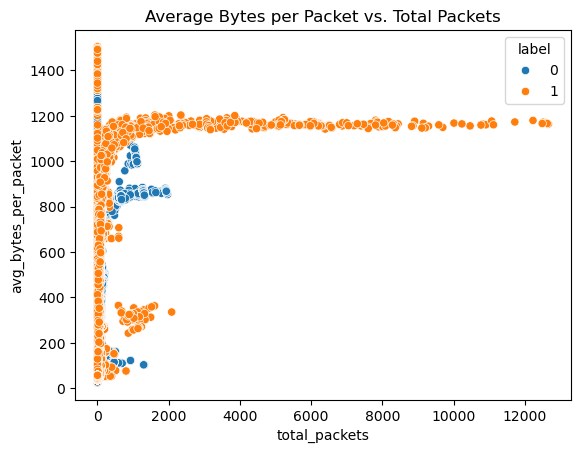

In [27]:
df['avg_bytes_per_packet'] = df['total_bytes'] / df['total_packets']
sns.scatterplot(x='total_packets', y='avg_bytes_per_packet', hue='label', data=df)
plt.title('Average Bytes per Packet vs. Total Packets')
plt.show()

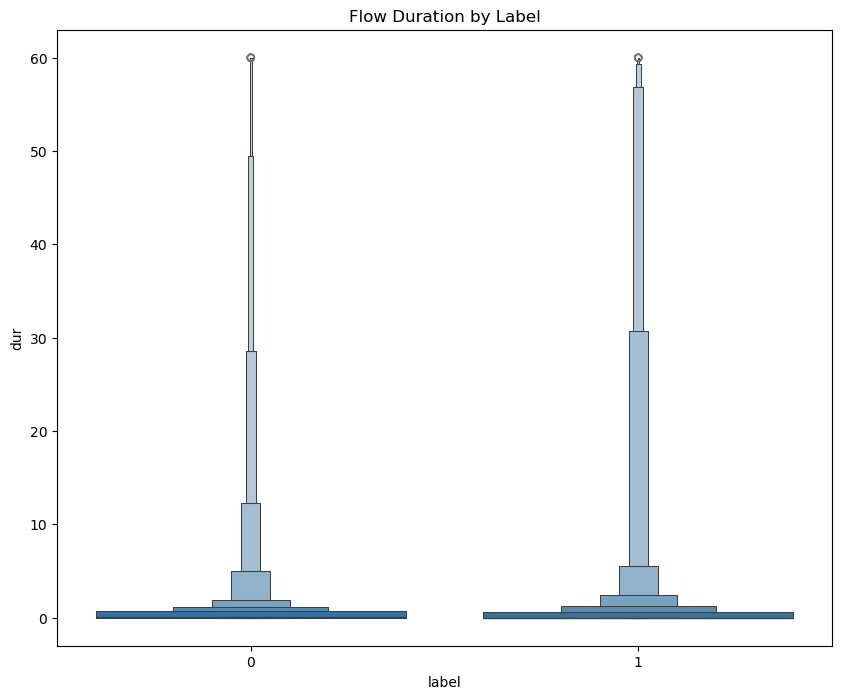

In [28]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x='label', y='dur', data=df)
plt.title('Flow Duration by Label')
plt.show()

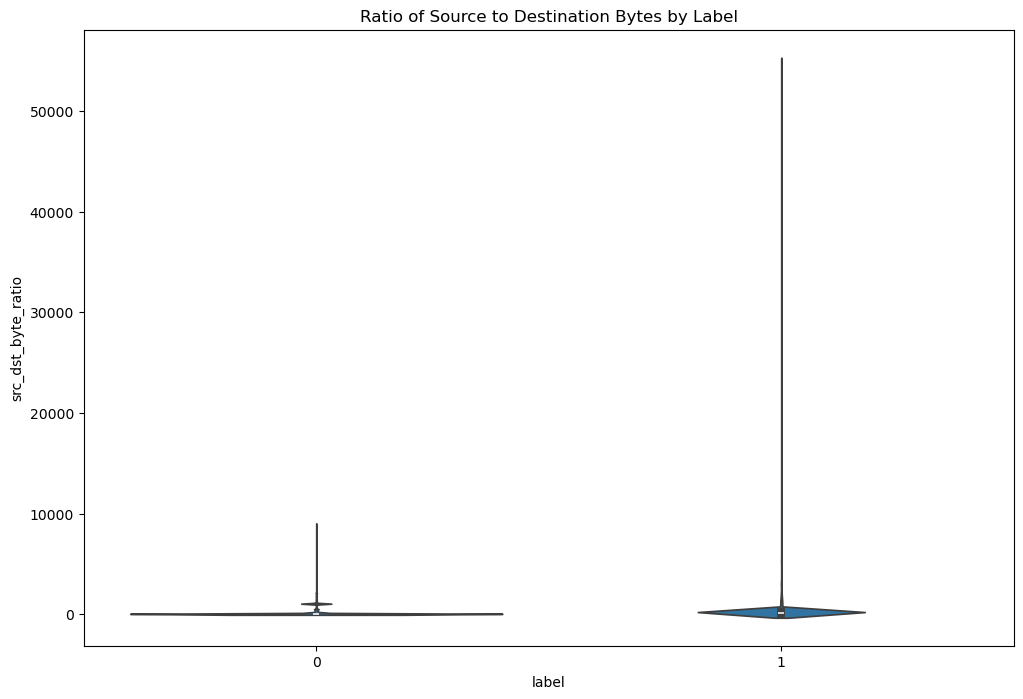

In [29]:
df['src_dst_byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)  # Add 1 to avoid division by zero
plt.figure(figsize=(12, 8))
sns.violinplot(x='label', y='src_dst_byte_ratio', data=df)
plt.title('Ratio of Source to Destination Bytes by Label')
plt.show()

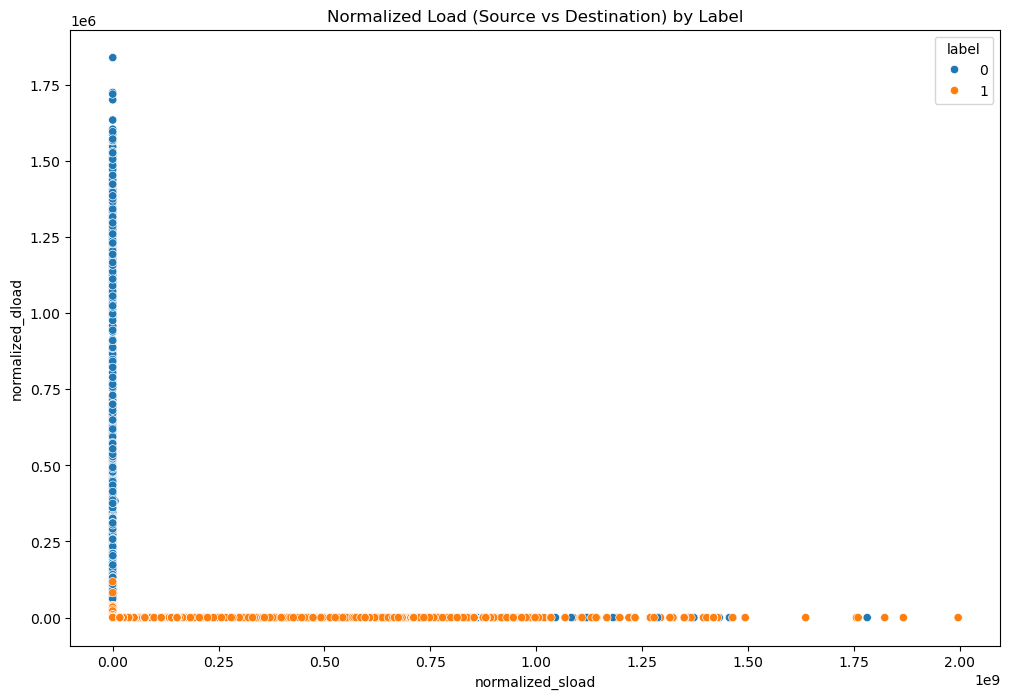

In [30]:
df['normalized_sload'] = df['sload'] / (df['spkts'] + 1)
df['normalized_dload'] = df['dload'] / (df['dpkts'] + 1)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='normalized_sload', y='normalized_dload', hue='label', data=df)
plt.title('Normalized Load (Source vs Destination) by Label')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Implement and evaluate models with hyperparameter tuning
# Random Forest with GridSearchCV
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
rf_best = rf_grid_search.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_score = accuracy_score(y_test, rf_pred)

In [ ]:
# Support Vector Machine with GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)
svm_best = svm_grid_search.best_estimator_
svm_pred = svm_best.predict(X_test)
svm_score = accuracy_score(y_test, svm_pred)

In [ ]:
# Create a DataFrame with the algorithm names and accuracy scores
accuracy_scores = pd.DataFrame({
    'Algorithm': ['Random Forest (Tuned)', 'Support Vector Machine (Tuned)'],
    'Accuracy Score': [rf_score, svm_score]
})

In [ ]:
# Sort the DataFrame by accuracy score in descending order
accuracy_scores = accuracy_scores.sort_values(by='Accuracy Score', ascending=False)

# Add a Rank column based on the sorted accuracy scores
accuracy_scores['Rank'] = range(1, len(accuracy_scores) + 1)

In [ ]:
# Reorder the DataFrame columns
accuracy_scores = accuracy_scores[['Rank', 'Algorithm', 'Accuracy Score']]

# Display the ranking table using tabulate
print(tabulate(accuracy_scores, headers='keys', tablefmt='fancy_grid', showindex=False))

# Plot the classifier accuracy scores
plt.figure(figsize=(8, 4))
plt.bar(accuracy_scores['Algorithm'], accuracy_scores['Accuracy Score'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Scores (Tuned)')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()